# Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
bikes_df = pd.read_csv("BikeCounter - Clean.csv")
bikes_df

,Date,Total
0,2012-10-03 00:00:00,13.0
1,2012-10-03 01:00:00,10.0
2,2012-10-03 02:00:00,2.0
3,2012-10-03 03:00:00,5.0
4,2012-10-03 04:00:00,7.0
...,...,...
91219,2023-02-28 19:00:00,59.0
91220,2023-02-28 20:00:00,37.0
91221,2023-02-28 21:00:00,30.0
91222,2023-02-28 22:00:00,14.0


# Create Time Series Object

In [3]:
bikes_df['Date'] = pd.to_datetime(bikes_df['Date'])
bikes_df.set_index('Date',inplace=True)
bikes_df = bikes_df.resample("MS").sum()
bikes_df.head()

,Total
Date,
2012-10-01,65695.0
2012-11-01,50647.0
2012-12-01,36369.0
2013-01-01,44884.0
2013-02-01,50027.0


# Seasonal Decompose

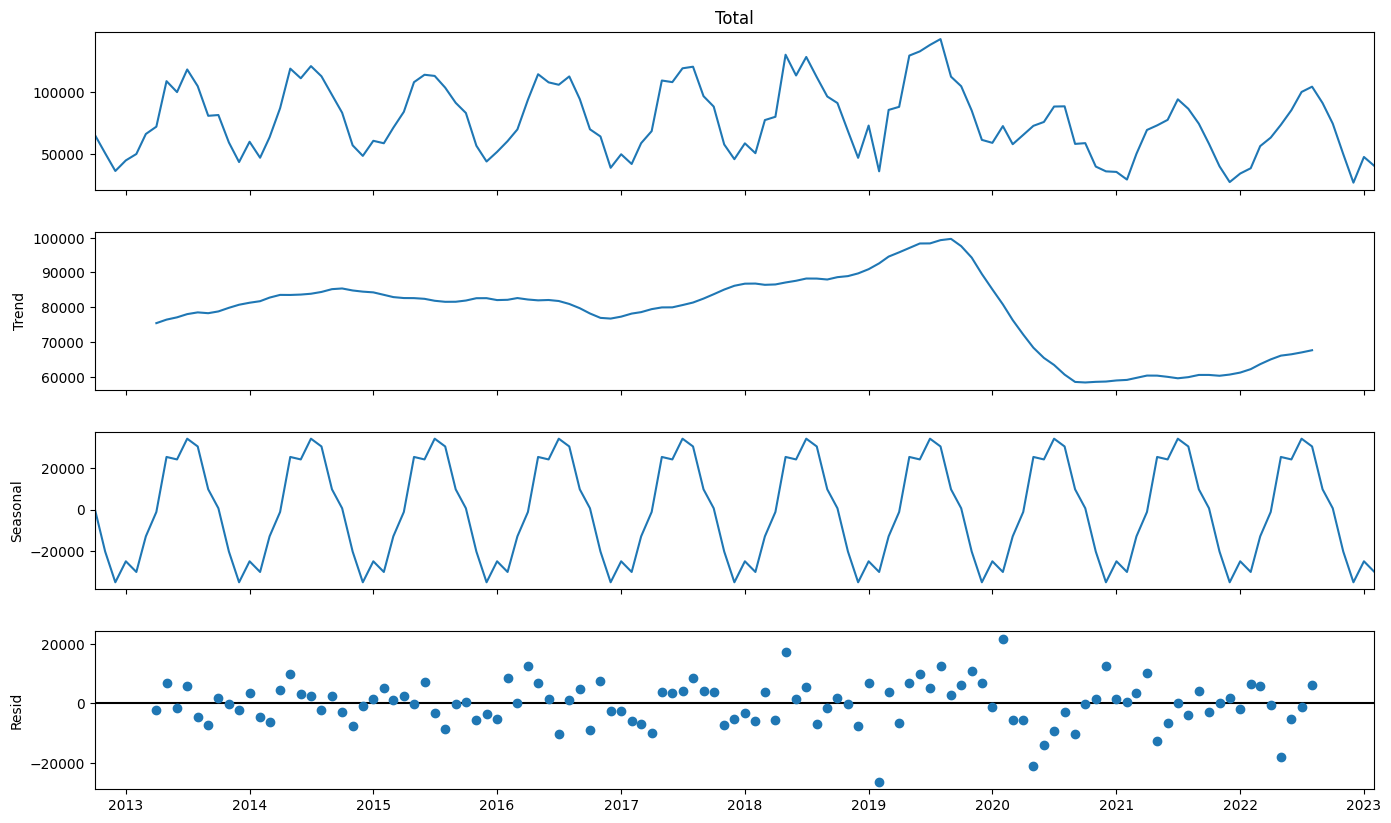

In [4]:
bikes_decompose = seasonal_decompose(bikes_df['Total'],model="addititve")
fig = bikes_decompose.plot()
fig.set_size_inches(16,9)
plt.show()

# Train-Test Split

In [5]:
size = int(len(bikes_df)*0.8)
train_df = bikes_df[:size]
test_df = bikes_df[size:]

In [6]:
train_df.tail()

,Total
Date,
2020-09-01,58143.0
2020-10-01,58751.0
2020-11-01,39924.0
2020-12-01,36077.0
2021-01-01,35616.0


In [7]:
test_df.head()

,Total
Date,
2021-02-01,29479.0
2021-03-01,50203.0
2021-04-01,69345.0
2021-05-01,73033.0
2021-06-01,77473.0


# Holt Winters Forecasting

In [8]:
model = ExponentialSmoothing(train_df['Total'],
                             trend="additive",
                             seasonal = "additive",
                             seasonal_periods = 12)
fitted_model = model.fit()
predictions_df = fitted_model.forecast(24)

C:\Users\akanungo\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


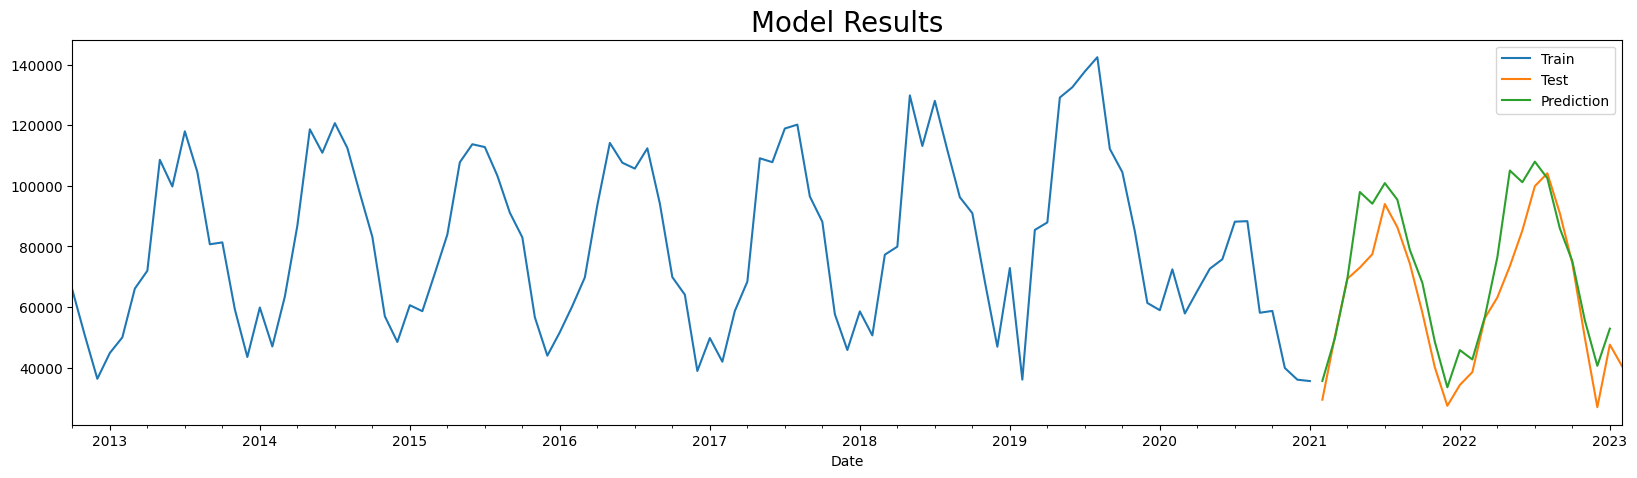

In [9]:
train_df['Total'].plot(legend=True,label="Train",figsize=(20,5))
test_df['Total'].plot(legend=True,label="Test")
predictions_df.plot(legend=True,label="Prediction")
plt.title("Model Results",size=20)
plt.show()

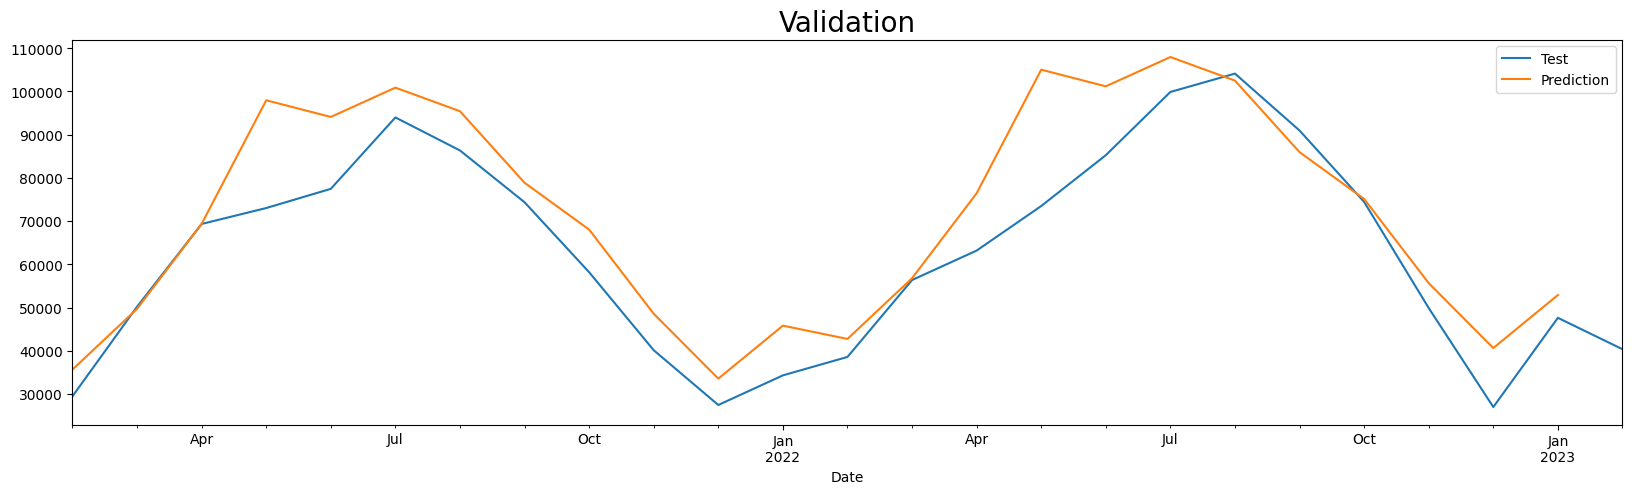

In [10]:
test_df['Total'].plot(legend=True,label="Test", figsize=(20,5))
predictions_df.plot(legend=True,label="Prediction")
plt.title("Validation",size=20)
plt.show()

# Looking Ahead

In [11]:
predictions_df = fitted_model.forecast(60)

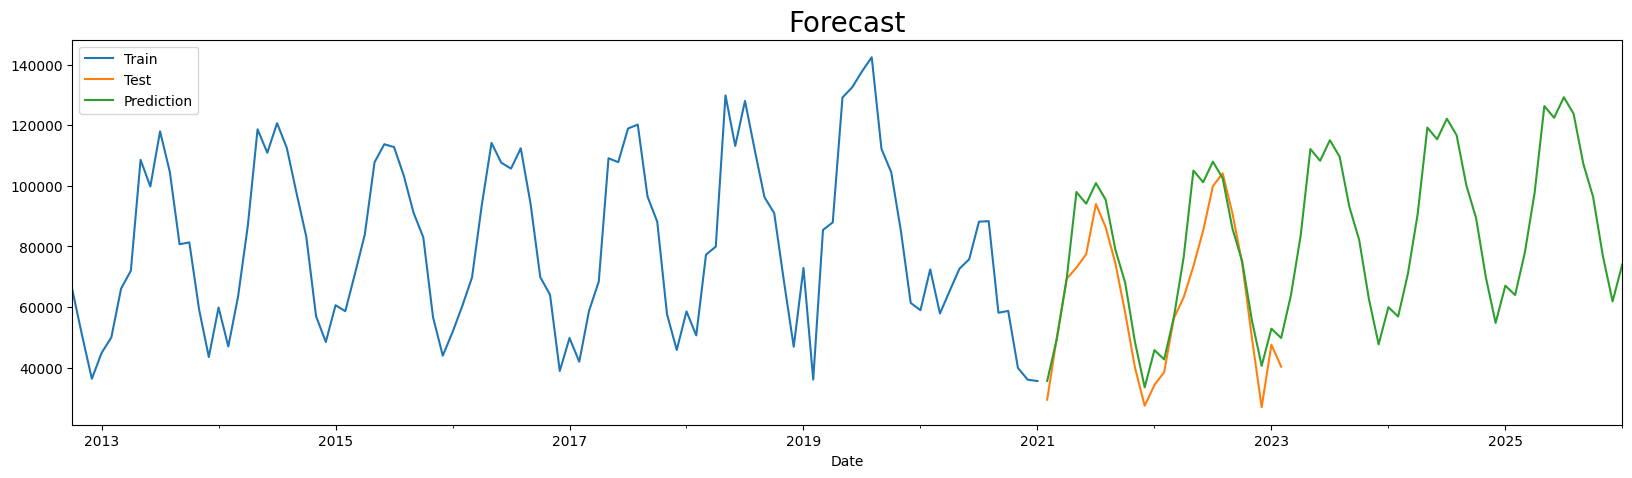

In [12]:
train_df['Total'].plot(legend=True,label="Train",figsize=(20,5))
test_df['Total'].plot(legend=True,label="Test")
predictions_df.plot(legend=True,label="Prediction")
plt.title("Forecast",size=20)
plt.show()